In [96]:
%matplotlib inline
import madmom
import numpy as np
import librosa

In [75]:
#playing the audio
import IPython.display as ipd
ipd.Audio('/Users/pranjal/Desktop/audio_feature_extraction/data/guitar.wav')

## Root Mean Square

In [70]:
from madmom.audio.signal import FramedSignal
from madmom.audio.signal import root_mean_square


fs = FramedSignal('/Users/pranjal/Desktop/audio_feature_extraction/data/guitar.wav', num_channels=1, fps=100)
rms = root_mean_square(fs)
rms

In [77]:
from madmom.audio.signal import Signal
s = Signal('/Users/pranjal/Desktop/audio_feature_extraction/data/guitar.wav', num_channels=1, sample_rate=44100)
s


Signal([  201,    23,    21, ..., -5345, -4768, -4363], dtype=int16)

## Zero Crossing Rate

In [74]:
from librosa.feature import zero_crossing_rate
from librosa.core import load 
wav_file = load ('/Users/pranjal/Desktop/audio_feature_extraction/data/guitar.wav', sr=44100)

zcr = zero_crossing_rate(wav_file[0], frame_length=2048, hop_length=441)

#gives the scaled value of zcr from 0 to 1
zcr

array([[ 0.16992188,  0.22949219,  0.27490234, ...,  0.015625  ,
         0.01074219,  0.00732422]])

In [40]:
from madmom.audio.signal import Signal
s = Signal('/Users/pranjal/Desktop/audio_feature_extraction/data/guitar.wav', num_channels=1)
s

Signal([  201,    23,    21, ..., -5345, -4768, -4363], dtype=int16)

## Power Spectrum

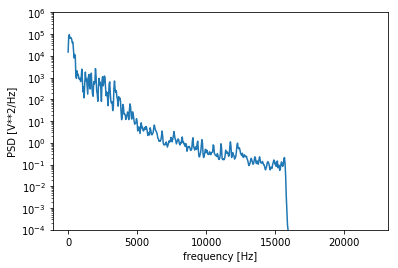

In [42]:
from scipy import signal
import matplotlib.pyplot as plt
from madmom.audio.signal import Signal

#calculating PSD using Welch's method
s = Signal('/Users/pranjal/Desktop/audio_feature_extraction/data/guitar.wav', num_channels=1)
f, Pxx_den = signal.welch(s, 44100, nperseg=1024)

#plotting the PSD
plt.semilogy(f, Pxx_den)
plt.ylim([10e-5, 10e5])
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.show()

## Spectrogram

/anaconda3/lib/python3.6/site-packages/librosa/core/spectrum.py:958: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(magphase(D)[0]) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


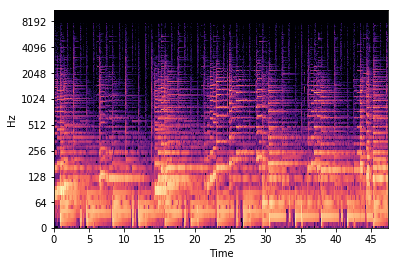

In [100]:
import librosa.display
from librosa.core.spectrum import stft
from librosa.core import amplitude_to_db

st = stft(wav_file[0])
arr = amplitude_to_db(st, ref=np.max)

librosa.display.specshow(arr, y_axis='log', x_axis='time')

## MFCCs

In [67]:
from librosa.feature import mfcc
from librosa.core import load 
wav_file = load ('/Users/pranjal/Desktop/audio_feature_extraction/data/guitar.wav', sr=44100)
m = mfcc(y=wav_file[0], sr=44100, n_mfcc=39)
m

array([[ -4.02339275e+02,  -3.97031911e+02,  -3.90455654e+02, ...,
         -2.05537277e+02,  -2.10268567e+02,  -2.02192758e+02],
       [  1.28651079e+01,   1.21737994e+01,   1.80055395e+01, ...,
          1.80922362e+02,   1.85021151e+02,   2.00746626e+02],
       [  1.07796097e+01,   8.14402514e+00,   5.05783186e+00, ...,
          7.84652332e+00,   6.38630670e+00,   6.83262325e+00],
       ..., 
       [  3.95114888e+00,   3.85251143e+00,   5.16223340e+00, ...,
         -9.02581795e+00,  -7.02039199e+00,  -1.90369232e+00],
       [ -1.37880507e+00,  -6.81387024e+00,  -6.25333712e+00, ...,
         -4.96624948e+00,  -5.71395779e+00,  -3.86162254e+00],
       [  8.04232828e+00,   7.43208449e+00,  -3.86201786e-01, ...,
          1.47864843e+00,  -9.43419808e-01,   3.56345241e+00]])

## Loudness

In [50]:
from librosa.core import amplitude_to_db
loud = amplitude_to_db (s)
loud

array([-34.8464285 ,  27.23455672,  26.44438589, ..., -34.8464285 ,
       -34.8464285 ,  44.81858091])